### Lanzhou University
### INFO 213: Data Science Programming II, Fall 2022
---

## Final Project Report

## Project Title: Prediction and Analyses of House Prices

## Team ID: C2T11

## Student(s):
|  Name  |  Student ID  |
|  :----:  |  :----:  |
|  Wenbo Liu  |  320200931121  |
|  Chengkai Lin  |  320200945841  |
|  Xuda Han  |  320200945781  |

#### Date: 22/12/1
---

#### Abstract
---
*(Briefly summarize the project including the problem, data sets, models, and final findings.)* 

旭达这里不要忘了写

### 1. Introduction
---
*(Introduce the project, describe the objectives, and highlight the key findings.)* 

We are going to use a dataset called Boston Housing Data, and run some exploratory analyses to have better understanding of the dataset. We would use linear regression model to predict the house price, and draw some line charts to see how some attributes affects the price.

### 2. Problem Definition
---
*(Define the problem that will be solved in this data analytics project.)*

We would use linear regression to train different models of `MEDV` using `CRIM`, `RM` and `LSTAT`, then use them to predict the house price and see which is the most accurate one.<br />

We would also see how these attributes affects the price.

### 3. Data Sets
---
*(Describe the origin of the data sources. What is the format of the original data? How to access the data?)*

The dataset is taken from the StatLib library which is maintained at Carnegie Mellon University, uploaded on July 7, 1993, and is downloadable via GitHub<br/>

Link: https://github.com/jbrownlee/Datasets/blob/master/housing.csv<br/><br/>
Format:
- `CRIM`:      per capita crime rate by town
- `ZN`:        proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`:     proportion of non-retail business acres per town
- `CHAS`:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- `NOX`:       nitric oxides concentration (parts per 10 million)
- `RM`:        average number of rooms per dwelling
- `AGE`:       proportion of owner-occupied units built prior to 1940
- `DIS`:       weighted distances to five Boston employment centres
- `RAD`:       index of accessibility to radial highways
- `TAX`:       full-value property-tax rate per 10,000 dollar
- `PTRATIO`:   pupil-teacher ratio by town
- `B`:         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT`:     % lower status of the population
- `MEDV`:      Median value of owner-occupied homes in 1000's dollar

In [1]:
import pandas as pd

# Load data from a csv file
housing = pd.read_csv('Datasets/housing.csv', names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

# Print the dataframe
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### 4. Preparation
---
*(Describe and present any code and methods for cleaning, munging, combining, normalizing, reshaping, slicing and dicing, and transforming data for analysis.)*

Import library

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'ticks', font_scale=0.9)

在得到数据后，我们对数据进行了清洗。首先，我们对数据进行切片，提取出我们需要的列。其次，我们剔除了含有缺失项的行。

In [3]:
# Remove columns we don't need
housing = housing[['CRIM','RM','LSTAT','MEDV']]

# Remove rows with missing data
housing = housing.dropna(axis=0, how='any')

# Print the dataframe
housing

,CRIM,RM,LSTAT,MEDV
0,0.00632,6.575,4.98,24.0
1,0.02731,6.421,9.14,21.6
2,0.02729,7.185,4.03,34.7
3,0.03237,6.998,2.94,33.4
4,0.06905,7.147,5.33,36.2
...,...,...,...,...
501,0.06263,6.593,9.67,22.4
502,0.04527,6.120,9.08,20.6
503,0.06076,6.976,5.64,23.9
504,0.10959,6.794,6.48,22.0


### 5. Exploration and Visualization
---
*(Describe and present any code and methods for exploring and visualizing the data by analyzing its statistics and correlations between different features.)*

为了更好地理解数据并建立模型，我们会想要了解数据的基本特征，包括数据的分布情况，中心趋势和变异性等等。pandas的dataframe为我们提供了describe()方法来计算描述上述特征的具体指标。从下面的数据中我们可以看出，价格的中位数的最大值是50，最小值是5，平均值是22.5，方差是9.2。

In [4]:
housing.describe()

,CRIM,RM,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000
mean,3.613524,6.284634,12.653063,22.532806
std,8.601545,0.702617,7.141062,9.197104
min,0.006320,3.561000,1.730000,5.000000
25%,0.082045,5.885500,6.950000,17.025000
50%,0.256510,6.208500,11.360000,21.200000
75%,3.677083,6.623500,16.955000,25.000000
max,88.976200,8.780000,37.970000,50.000000


当然，直接阅读表格是一种方法，可是我们并不能从这些数字中获取到什么有用的见解，因为单看数字会让我们感到困惑。matplotlib为我们提供了多种绘图方法，我们可以用盒须图将上面的计算结果都涵盖在内。在绘制盒须图时，我们未显示异常点，这是为了让箱体看起来更加地清楚。从图中我们可以看出，RM，LSTAT和MEDV的箱体位置靠近中间且中位数和平均数相对接近。这说明RM，LSTAT和MEDV的分布相对分散且没有过多的极端异常值存在。CRIM的分布就相对集中且存在极端异常值（中位数和平均值相差过大）。

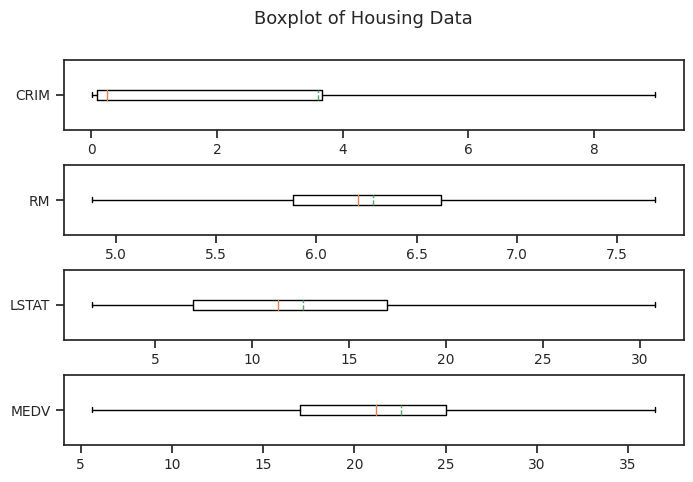

In [5]:
# Create a figure with 4 subplots
figure, axes = plt.subplots(4,1, figsize=(8,5))

# Plot boxplot of variables
for i in range(4):
    data = housing.iloc[:,i]
    axes[i].boxplot(data, vert=False, labels=[data.name], showfliers=False,
                    showmeans=True, meanline=True,
                    meanprops=dict(color='g', linestyle='--'))

# Adjust and show figure
figure.suptitle('Boxplot of Housing Data')
figure.subplots_adjust(hspace=0.5)
plt.show()

Pandas的dataframe是很好的数据呈现方式，但是用图表来表示数据会更加地直观。我们首先用散点图来看一下我们所关心的变量和价格之间的关系。从图中我们可以看出房屋的中位数价格和犯罪率，房屋中的房间数和低收入人群比例之间存在着明显地相关关系。即，房屋的中位数价格与犯罪率和低收入人群比例之间呈负相关，与房屋中的房间数之间呈正相关。

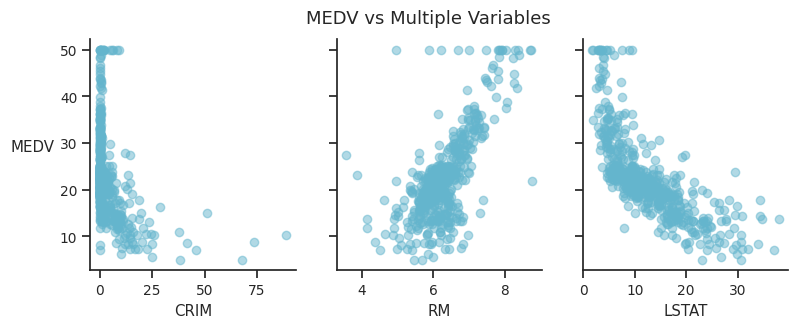

In [6]:
# Create a figure with 3 subplots
figure, axes = plt.subplots(1, 3, figsize=(9,3), sharey='all')

# Plot scatter plots for variables
for i in range(3):
    x = housing.iloc[:,i]
    axes[i].scatter(x=x, y=housing.MEDV, color='c',alpha=0.5)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].set_xlabel(x.name)
    if not i:
        axes[i].set_ylabel('MEDV', rotation='horizontal', labelpad=20)

# Adjust and show figure
plt.suptitle('MEDV vs Multiple Variables')
figure.subplots_adjust(wspace=0.2)
plt.show()

除了matplotlib以外，seaborn也为我们提供了很好的方法帮助我们理解数据。我们使用seaborn的pairplot()函数来查看不同变量之间关系。从图中我们清晰地可以看出房屋的中位数价格和其他变量之间存在的线性关系，其次我们还得到了其他的信息，那就是犯罪率、房间数、低收入人群比例及房屋的中位数价格数据符合正态分布。

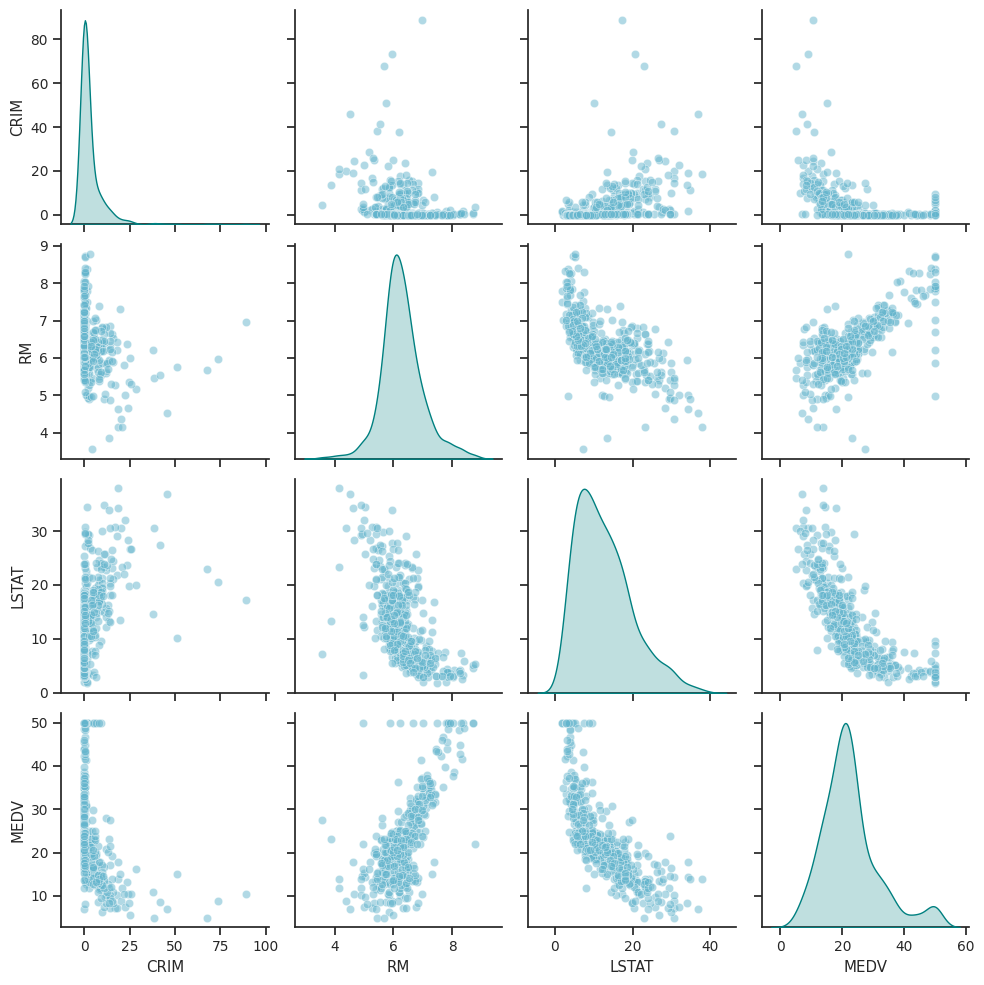

In [7]:
# Create pair plots for dataframe
sns.pairplot(housing,diag_kind="kde",
             plot_kws=dict(color="c", alpha=0.5),
             diag_kws=dict(fill=True,color="teal"))

plt.show()

这为我们提供了一种思路。如果每个变量本身符合正太分布且变量之间存在线性关系的话，那么我们是否可以在一张图上同时将这两种关系都表现出来？为此，我们使用seaborn的jointplot()函数进行了绘图。我们在散点图的基础上添加了数据的拟合曲线，这让我们更加清楚地看出变量之间的线性关系。我们在散点图的旁边添加了变量的分布直方图和核密度曲线，这让我们直观的看出变量的分布情况。

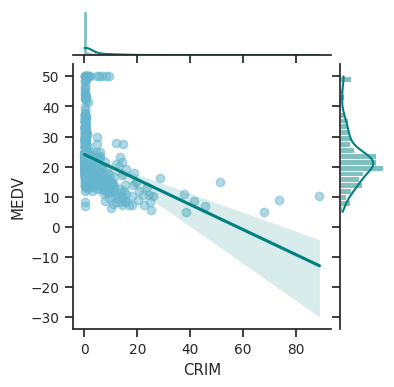

In [8]:
sns.jointplot(x='CRIM', y='MEDV', data=housing, kind='reg', height=4,
              joint_kws=dict(scatter_kws = {'color': 'c', 'alpha': 0.5}, line_kws = {'color': 'teal'}),
              marginal_kws=dict(color='teal'))

plt.show()

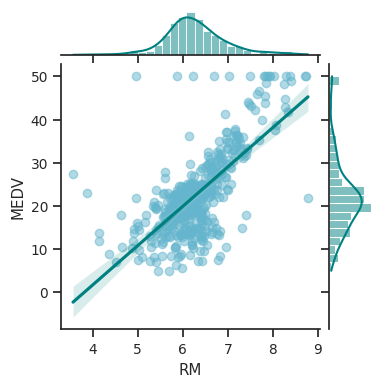

In [9]:
sns.jointplot(x='RM', y='MEDV', data=housing, kind='reg', height=4,
              joint_kws=dict(scatter_kws = {'color': 'c', 'alpha': 0.5}, line_kws = {'color': 'teal'}),
              marginal_kws=dict(color='teal'))

plt.show()

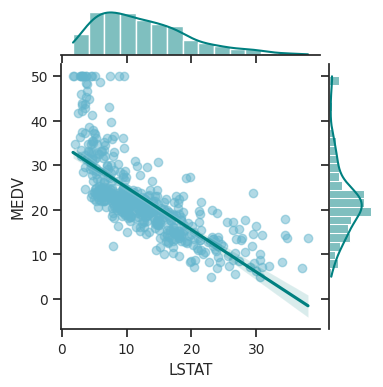

In [10]:
sns.jointplot(x='LSTAT', y='MEDV', data=housing, kind='reg',height=4,
              joint_kws=dict(scatter_kws = {'color': 'c', 'alpha': 0.5}, line_kws = {'color': 'teal'}),
              marginal_kws=dict(color='teal'))

plt.show()

### 6. Modeling and Evaluation
---
*(Describe and present the predictive models built on the data and evaluate the performance of the models for solving the problem)*

In [18]:
from scipy import stats

class regressionModel():
    def __init__(self, column):
        lr = stats.linregress(housing[column], housing["MEDV"])
        self.m = lr[0]
        self.b = lr[1]
        self.col = column

    def __repr__(self):
        return f"""
Regression function for {self.col}:
    f(x) = {self.m}x + {self.b}
Range of {self.col}:
    {housing[self.col].min()} - {housing[self.col].max()}\n"""

    def __call__(self, value):
        return self.m * value + self.b

    @property
    def predicted(self):
        return housing.apply(lambda x: self(x[self.col]), axis = 1)

    @property
    def mse(self):
        return housing.apply(lambda x: (x["MEDV"] - self(x[self.col])) ** 2 / len(housing), axis=1).sum()

    @property
    def rs(self):
        return 1 - self.mse / self.predicted.var()

In [19]:
crim = regressionModel("CRIM")
rm = regressionModel("RM")
lstat = regressionModel("LSTAT")

print(crim, rm, lstat)

print(
crim.mse,
rm.mse,
lstat.mse,
crim.rs,
rm.rs,
lstat.rs,
sep = "\n"
)


Regression function for CRIM:
    f(x) = -0.41519027791509056x + 24.03310617412388
Range of CRIM:
    0.00632 - 88.9762
 
Regression function for RM:
    f(x) = 9.102108981180306x + -34.67062077643854
Range of RM:
    3.561 - 8.78
 
Regression function for LSTAT:
    f(x) = -0.9500493537579909x + 34.55384087938311
Range of LSTAT:
    1.73 - 37.97

71.69073588196659
43.60055177116956
38.48296722989415
-4.621027954239069
-0.06603248482960011
0.16391454322790855


### 7. Conclusion
---
*(Briefly describe what you have done and what you discovered. Discuss any shortcomings of the process and results. Propose future work. **Finally, discuss the lessons learned from doing the project**.)*

### 8. References

---
(*Use the following requirements for writing your reports. DO NOT DELETE THE CELLS BELLOW*)

# Project Requirements

This final project examines the level of knowledge the students have learned from the course. The following course outcomes will be checked against the content of the report:

Upon successful completion of this course, a student will be able to:
* Describe the key Python tools and libraries that related to a typical data analytics project. 
* Identify data science libraries, frameworks, modules, and toolkits in Python that efficiently implement the most common data science algorithms and techniques.
* Apply latest Python techniques in data acquisition, transformation and predictive analytics for data science projects.
* Discuss the underlying principles and main characteristics of the most common methods and techniques for data analytics. 
* Build data analytic and predictive models for real world data sets using existing Python libraries.

** Marking will be foucsed on both presentation and content.** 

## Written Presentation Requirements
The report will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as its contents. Please make sure that the text of your report is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

## Technical Content:
* Is the problem well defined and described thoroughly?
* Is the size and complexity of the data set used in this project comparable to that of the example data sets used in the lectures and assignments?
* Did the report describe the charactriatics of the data?
* Did the report describe the goals of the data analysis?
* Did the analysis conduct exploratory analyses on the data?
* Did the analysis build models of the data and evaluate the performance of the models?
* Overall, what is the rating of this project?